In [12]:
import os

os.chdir('/home/jwdase/projects/language-detection/src')

In [13]:
import pandas as pd
from language_detection.data.csv_tools.read import load_df

languages = ['en', 'it', 'de', 'es', 'ta', 'ja', 'nl']
lang_to_df = load_df(languages)

Loaded: en from /om2/user/moshepol/prosody/data/raw_audio/en/custom/length.csv
Loaded: it from /om2/user/moshepol/prosody/data/raw_audio/it/custom/length.csv
Loaded: de from /om2/user/moshepol/prosody/data/raw_audio/de/custom/length.csv
Loaded: es from /om2/user/moshepol/prosody/data/raw_audio/es/custom/length.csv
Loaded: ta from /om2/user/moshepol/prosody/data/raw_audio/ta/custom/length.csv
Loaded: ja from /om2/user/moshepol/prosody/data/raw_audio/ja/custom/length.csv
Loaded: nl from /om2/user/moshepol/prosody/data/raw_audio/nl/custom/length.csv


In [14]:
from language_detection.data.csv_tools.read import key_length

lang_to_length = {}

for lang, df in lang_to_df.items():
    key_length_dict = {}
    for key in list(df.columns)[2:]:
        key_length_dict[key] = key_length(df, key)

    lang_to_length[lang] = key_length_dict

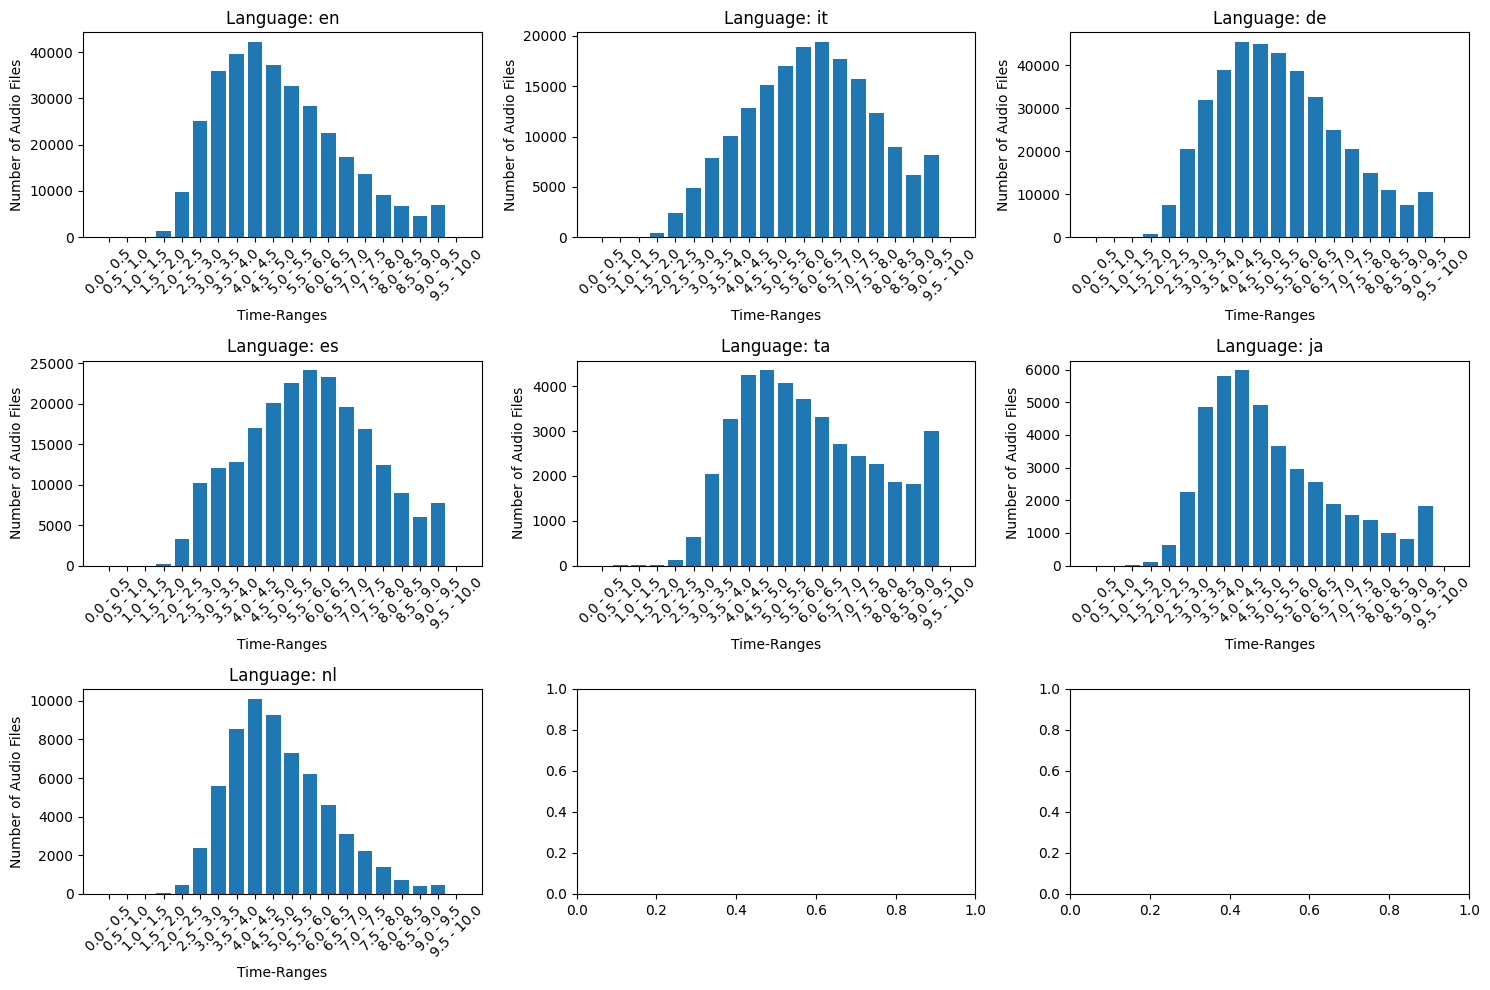

In [15]:
import matplotlib.pyplot as plt

titles = [f'Language: {lang}' for lang in languages]
datasets = [item for _, item in lang_to_length.items()]

fig, axs = plt.subplots(3, 3, figsize=(15, 10))  # 2x2 grid

for i, ax in enumerate(axs.flat):
    try: 
        keys = list(datasets[i].keys())
        values = list(datasets[i].values())
        
        ax.bar(keys, values)
        ax.set_title(titles[i])
        ax.set_xlabel('Time-Ranges')
        ax.set_ylabel('Number of Audio Files')
        ax.tick_params(axis='x', rotation=45)
    except IndexError:
        pass

plt.tight_layout()
plt.savefig("plots/figures/audio_recordings.pdf", format="pdf")